Setup Complete. Starting Project Simulations...


PART 1: GENETIC ALGORITHMS (DATASET SET 6)
Problem: Knapsack Problem | Capacity: 73 | Population: 20

--- Generation 1 Results ---
ID   Genome                         Weight   Value    Fitness 
-----------------------------------------------------------------
1    [0 1 0 0 0 1 0 0 0 1]          25       29       29      
2    [0 0 0 0 1 0 1 1 1 0]          43       40       40      
3    [1 0 1 1 1 1 1 1 1 1]          90       74       0       
4    [0 0 1 1 1 0 1 0 0 0]          37       37       37      
5    [0 0 1 1 1 1 1 0 1 1]          68       63       63      
6    [0 1 0 1 0 1 1 0 0 0]          31       42       42      
7    [0 0 0 0 0 1 1 0 1 1]          34       38       38      
8    [1 1 0 1 0 1 1 1 0 1]          59       56       56      
9    [0 1 0 1 0 0 1 0 1 1]          30       40       40      
10   [1 1 1 1 1 1 1 1 1 0]          87       83       0       
11   [0 1 1 1 1 1 1 1 1 0]          82       79       0     

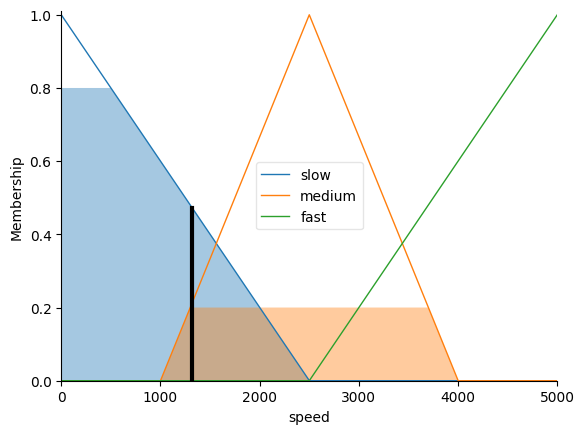

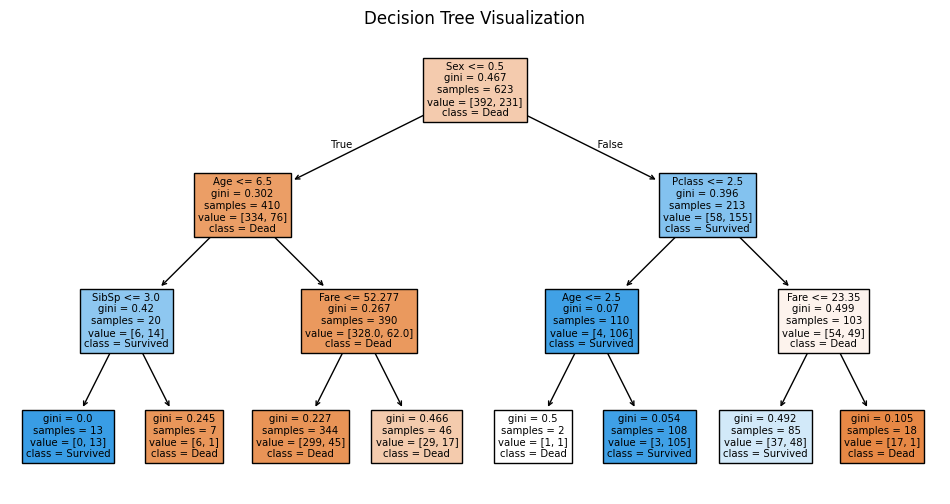


All tasks completed successfully.


In [4]:
# =============================================================================
# APPLICATIONS OF ARTIFICIAL INTELLIGENCE IN IT - FINAL PROJECT REPORT
# GROUP F: Dogancan Yucel (104009), Murat Emre Bulduk (103536), Denizhan Demirhan (105375)
# =============================================================================

# 1. SETUP & LIBRARIES
# -----------------------------------------------------------------------------
try:
    import skfuzzy
except ImportError:
    print("Installing necessary libraries...")
    !pip install scikit-fuzzy -q

import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Configuration for clearer output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("Setup Complete. Starting Project Simulations...\n")


# =============================================================================
# PART 1: GENETIC ALGORITHMS
# Dataset: Set 6 (Calculated based on student IDs sum)
# =============================================================================
print("\n" + "="*80)
print("PART 1: GENETIC ALGORITHMS (DATASET SET 6)")
print("Problem: Knapsack Problem | Capacity: 73 | Population: 20")
print("="*80)

# Data Definition (Set 6)
# Format: [Weight, Value]
items_set_6 = np.array([
    [5, 4], [3, 12], [11, 9], [9, 4], [14, 12],
    [16, 14], [3, 12], [17, 7], [9, 9], [6, 3]
])

MAX_CAPACITY = 73
POPULATION_SIZE = 20
CROSSOVER_RATE = 0.8
MUTATION_RATE = 0.1
NUM_ITEMS = len(items_set_6)

# Fitness Function with Penalty
def calculate_fitness(individual, items, max_cap):
    total_weight = np.sum(individual * items[:, 0])
    total_value = np.sum(individual * items[:, 1])

    # Penalty: If overloaded, fitness is 0
    if total_weight > max_cap:
        return 0, total_weight, total_value
    return total_value, total_weight, total_value

# Initial Population
np.random.seed(42) # Fixed seed for reproducibility
population = np.random.randint(0, 2, size=(POPULATION_SIZE, NUM_ITEMS))

def print_generation_table(gen_num, pop):
    print(f"\n--- Generation {gen_num} Results ---")
    print(f"{'ID':<4} {'Genome':<30} {'Weight':<8} {'Value':<8} {'Fitness':<8}")
    print("-" * 65)

    fitness_values = []
    for i, ind in enumerate(pop):
        fit, w, v = calculate_fitness(ind, items_set_6, MAX_CAPACITY)
        fitness_values.append(fit)
        print(f"{i+1:<4} {str(ind):<30} {w:<8} {v:<8} {fit:<8}")

    best_idx = np.argmax(fitness_values)
    print(f"\n>> Best Individual in Gen {gen_num}: Value = {fitness_values[best_idx]}")
    return np.array(fitness_values)

# RUN GENERATION 1
fitness_gen1 = print_generation_table(1, population)

# EVOLUTION (Selection, Crossover, Mutation)
new_population = []
for _ in range(POPULATION_SIZE // 2):
    # Tournament Selection
    p1 = population[np.argmax(np.random.choice(fitness_gen1, 3))]
    p2 = population[np.argmax(np.random.choice(fitness_gen1, 3))]

    # Crossover
    c1, c2 = p1.copy(), p2.copy()
    if np.random.rand() < CROSSOVER_RATE:
        pt = np.random.randint(1, NUM_ITEMS-1)
        c1 = np.concatenate([p1[:pt], p2[pt:]])
        c2 = np.concatenate([p2[:pt], p1[pt:]])

    # Mutation
    for c in [c1, c2]:
        for i in range(NUM_ITEMS):
            if np.random.rand() < MUTATION_RATE:
                c[i] = 1 - c[i]
    new_population.extend([c1, c2])

population = np.array(new_population)

# RUN GENERATION 2
fitness_gen2 = print_generation_table(2, population)


# =============================================================================
# PART 2: FUZZY LOGIC CONTROLLER
# Topic: 11 (Saw blade rotational speed control)
# =============================================================================
print("\n\n" + "="*80)
print("PART 2: FUZZY LOGIC CONTROLLER (TOPIC 11)")
print("System: Saw Blade Speed Control based on Wood Hardness & Cutting Time")
print("="*80)

# Antecedents & Consequent
hardness = ctrl.Antecedent(np.arange(0, 11, 1), 'hardness') # 0-10
time = ctrl.Antecedent(np.arange(0, 61, 1), 'time')         # 0-60 min
speed = ctrl.Consequent(np.arange(0, 5001, 1), 'speed')     # 0-5000 RPM

# Membership Functions
hardness.automf(3, names=['soft', 'medium', 'hard'])
time.automf(3, names=['short', 'medium', 'long'])

speed['slow'] = fuzz.trimf(speed.universe, [0, 0, 2500])
speed['medium'] = fuzz.trimf(speed.universe, [1000, 2500, 4000])
speed['fast'] = fuzz.trimf(speed.universe, [2500, 5000, 5000])

# Rules
rule1 = ctrl.Rule(hardness['soft'] & time['short'], speed['fast'])
rule2 = ctrl.Rule(hardness['medium'], speed['medium'])
rule3 = ctrl.Rule(hardness['hard'], speed['slow'])
rule4 = ctrl.Rule(time['long'], speed['slow'])

# Simulation
saw_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
simulation = ctrl.ControlSystemSimulation(saw_ctrl)

# Test Scenarios
scenarios = [
    {'hardness': 2, 'time': 10, 'desc': 'Soft Wood, Short Time'},
    {'hardness': 9, 'time': 50, 'desc': 'Hard Wood, Long Time'}
]

print("\n--- Simulation Results ---")
for s in scenarios:
    simulation.input['hardness'] = s['hardness']
    simulation.input['time'] = s['time']
    simulation.compute()
    print(f"Input: {s['desc']} (H={s['hardness']}, T={s['time']})")
    print(f"Output Speed: {simulation.output['speed']:.2f} RPM\n")

# Visualization (Optional)
try:
    speed.view(sim=simulation)
    print("(Visualization generated)")
except:
    pass


# =============================================================================
# PART 3 & 4: MACHINE LEARNING (TITANIC DATASET)
# Decision Trees & Naive Bayes
# =============================================================================
print("\n" + "="*80)
print("PART 3 & 4: MACHINE LEARNING (TITANIC)")
print("="*80)

# Load Data directly from URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)+

# Preprocessing
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df.dropna(inplace=True)

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Part 3: Decision Tree
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)

print(f"\nDecision Tree Accuracy: {dt_acc*100:.2f}%")

# Part 4: Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)

print(f"Naive Bayes Accuracy:   {nb_acc*100:.2f}%")

# Plot Tree
plt.figure(figsize=(12,6))
plot_tree(dt, feature_names=X.columns, class_names=['Dead', 'Survived'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

print("\nAll tasks completed successfully.")